## Objective - The task is to train a machine learning model to predict whether a bank customer will churn (leave the bank) or not based on various customer attributes and banking behavior. The goal is to create a model that can accurately identify customers who are likely to churn, enabling proactive retention strategies.

## 1. <u>Loading Dataset</u>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('Churn_Modelling.csv')

In [3]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.duplicated().sum()

0

In [6]:
df['Geography'].value_counts()


Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [7]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [8]:
df.drop(columns=['RowNumber','CustomerId','Surname'], inplace=True)

In [9]:
df.sample()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1111,833,Germany,Male,59,1,130854.59,1,1,1,30722.52,1


In [10]:
df.describe()


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [11]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### No Missing Values 

In [12]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

#### Analysis of the distribution of the 'Exited' variable

In [13]:
(df[df['Exited']==1].shape[0] / df.shape[0])*100

20.369999999999997

#### Analysis of the distribution of the 'Not Exited' variable

In [14]:
(df[df['Exited']==0].shape[0] / df.shape[0])*100

79.63

In [15]:
churns=df['Exited'].value_counts().reset_index()
churns

,Exited,count
0,0,7963
1,1,2037


## 2. <u>Exploratory Data Analysis</u>

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

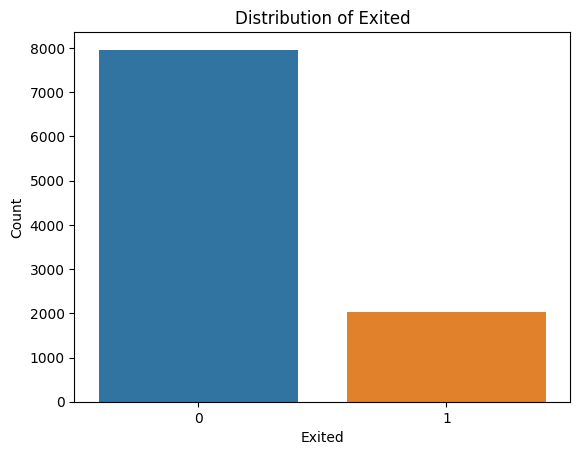

In [17]:
sns.barplot(x='Exited', y='count', data=churns)
plt.xlabel('Exited')
plt.ylabel('Count')
plt.title('Distribution of Exited')
plt.show()


#### The distribution of the dependent variable "Exited" shows an imbalanced dataset, with approximately 20.37% of the samples belonging to the positive class (1) and the majority class (0) accounting for 79.63% of the dataset. So we can see this is highly imbalanced data.

<Figure size 800x600 with 0 Axes>

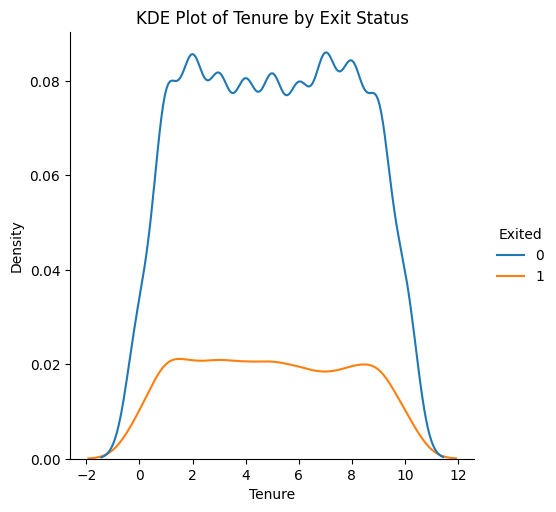

In [18]:
plt.figure(figsize=(8, 6))
sns.displot(data=df, x='Tenure', hue='Exited', kind='kde')

# Add labels and title
plt.xlabel('Tenure')
plt.ylabel('Density')
plt.title('KDE Plot of Tenure by Exit Status')

# Show the plot
plt.show()


#### The graph above illustrates a clear pattern: when customers have shorter tenure (meaning they've been with the company for less time), they are more likely to stop using the service (churn). To lower the chances of customers leaving, the company should focus on keeping them around for a longer time, as this decreases the likelihood of them churning.

In [19]:
churning=df[df['Exited']==1]
churning

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
9981,498,Germany,Male,42,3,152039.70,1,1,1,53445.17,1
9982,655,Germany,Female,46,7,137145.12,1,1,0,115146.40,1
9991,597,France,Female,53,4,88381.21,1,1,0,69384.71,1
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1


In [20]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

#### The calculate_ratio function is designed to analyze a bar plot represented by x. It separates the data into two categories: "Without Churn" and "With Churn," and calculates the ratio between these two categories.

In [21]:
def calculate_ratio(x):
    l=len(x.patches)
    count=0
    without_churn=[]
    with_churn=[]
    for c in x.patches:
        if count < l/2:
            without_churn.append(c.get_height())
        else:
            with_churn.append(c.get_height())
        count +=1;
    print("Without Churn: ",without_churn)
    print("With Churn: ",with_churn)

    
    ratio=[]
    for i in range(len(without_churn)):
        ratio.append(with_churn[i]/without_churn[i])
    print("Ratio: ",ratio)    

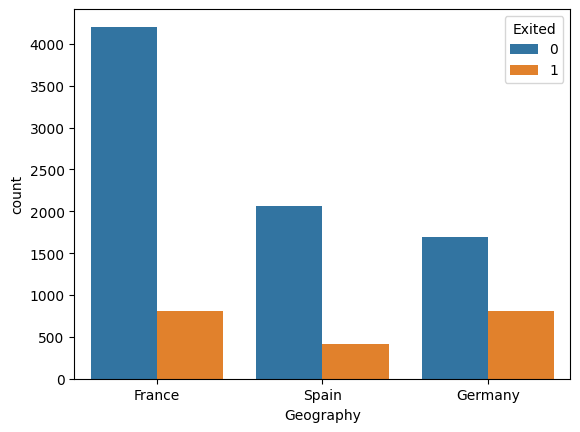

In [22]:
x= sns.countplot(x=df['Geography'],hue=df['Exited'])

#### The function calculates the ratio for three different segments of the plot, revealing insights into the relative impact of churn within each category.

#### The resulting ratios show that the presence of churn is more pronounced in the third category, where the ratio is significantly higher compared to the other two categories.

In [23]:
calculate_ratio(x)

Without Churn:  [4204.0, 2064.0, 1695.0]
With Churn:  [810.0, 413.0, 814.0]
Ratio:  [0.19267364414843008, 0.2000968992248062, 0.48023598820059]


### From the provided ratios, it's evident that Germany exhibits the highest ratio. This suggests that the majority of customers who churn originate from Germany. In other words, the churn rate among customers in Germany is notably higher compared to customers from other regions, as indicated by the elevated ratio.

<Axes: xlabel='Gender', ylabel='count'>

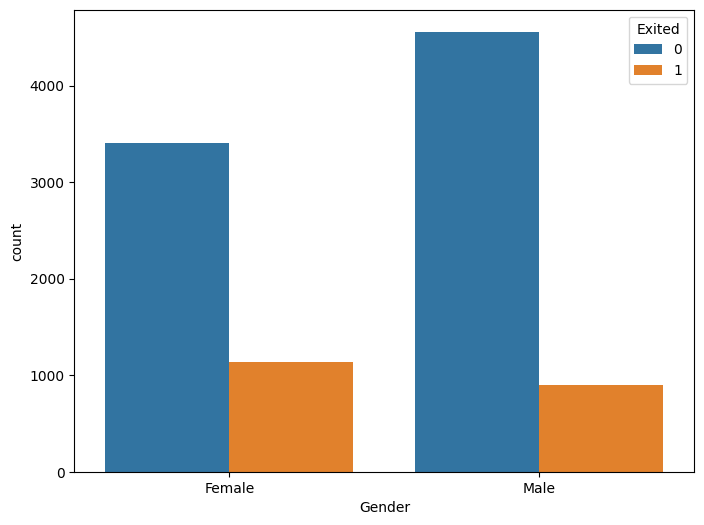

In [24]:
plt.figure(figsize=(8,6))
sns.countplot(x=df['Gender'], hue=df['Exited'])

In [25]:
(churning[churning['Gender'] == 'Female'].shape[0] / df[df['Gender'] == 'Female'].shape[0])*100

25.071538630860662

#### Female customers exhibit a higher likelihood of churning, with approximately 20-25% of them opting to do so, on average.

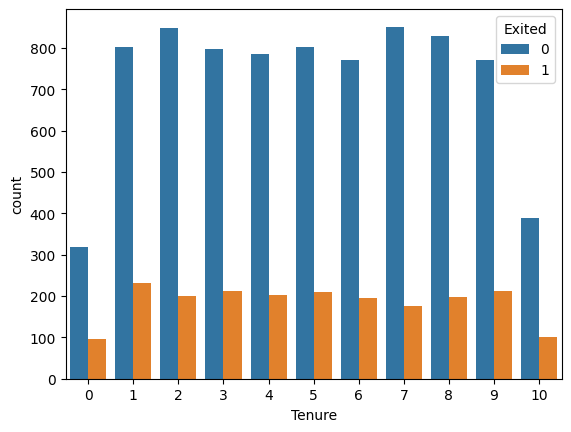

In [26]:
dev = sns.countplot(x=df['Tenure'], hue=df['Exited'])

In [27]:
calculate_ratio(dev)

Without Churn:  [318.0, 803.0, 847.0, 796.0, 786.0, 803.0, 771.0, 851.0, 828.0, 771.0, 389.0]
With Churn:  [95.0, 232.0, 201.0, 213.0, 203.0, 209.0, 196.0, 177.0, 197.0, 213.0, 101.0]
Ratio:  [0.29874213836477986, 0.2889165628891656, 0.23730814639905548, 0.2675879396984925, 0.2582697201017812, 0.2602739726027397, 0.25421530479896237, 0.20799059929494712, 0.23792270531400966, 0.27626459143968873, 0.2596401028277635]


#### Customers with 1 year Tenure are more likley to churn.

In [28]:
status = churning['HasCrCard'].value_counts().reset_index()
status

,HasCrCard,count
0,1,1424
1,0,613


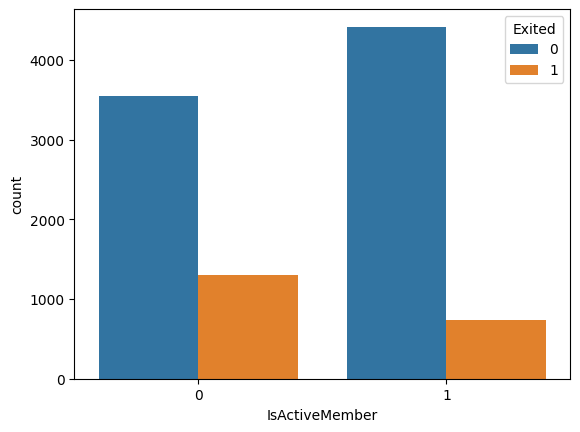

In [29]:
status = sns.countplot(x=df['IsActiveMember'], hue=df['Exited'])

In [30]:
calculate_ratio(status)

Without Churn:  [3547.0, 4416.0]
With Churn:  [1302.0, 735.0]
Ratio:  [0.3670707640259374, 0.16644021739130435]


#### Customers who are not an active member are more likely to Churn.

In [31]:
df['NumOfProducts'].unique()

array([1, 3, 2, 4], dtype=int64)

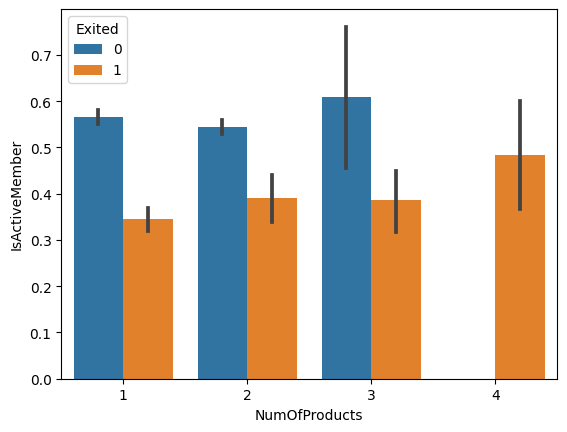

In [32]:
ProdPref = sns.barplot(x=df['NumOfProducts'], y=df['IsActiveMember'], hue = df['Exited'])

In [33]:
calculate_ratio(ProdPref)

Without Churn:  [0.5654421768707483, 0.5445544554455446, 0.6086956521739131, nan]
With Churn:  [0.34421575585521647, 0.39080459770114945, 0.38636363636363635, 0.48333333333333334]
Ratio:  [0.6087550061443313, 0.7176593521421107, 0.6347402597402597, nan]


<Axes: xlabel='NumOfProducts', ylabel='IsActiveMember'>

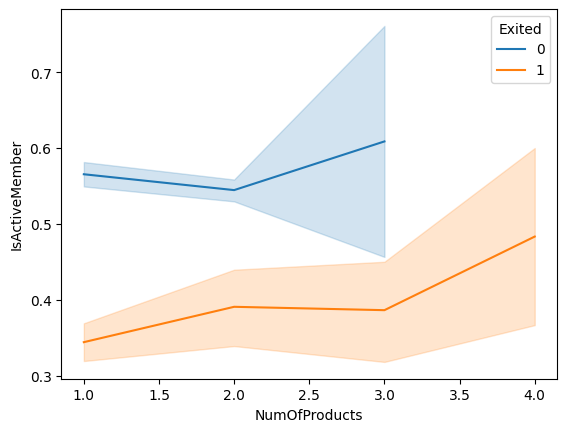

In [34]:
sns.lineplot(x=df['NumOfProducts'], y=df['IsActiveMember'], hue=df['Exited'])

#### The graph above reveals that a significant proportion of churning customers possess a larger number of products. This underscores the importance for the company to prioritize long-term customer relationships and maintain consistent product quality.






<Axes: xlabel='CreditScore', ylabel='Count'>

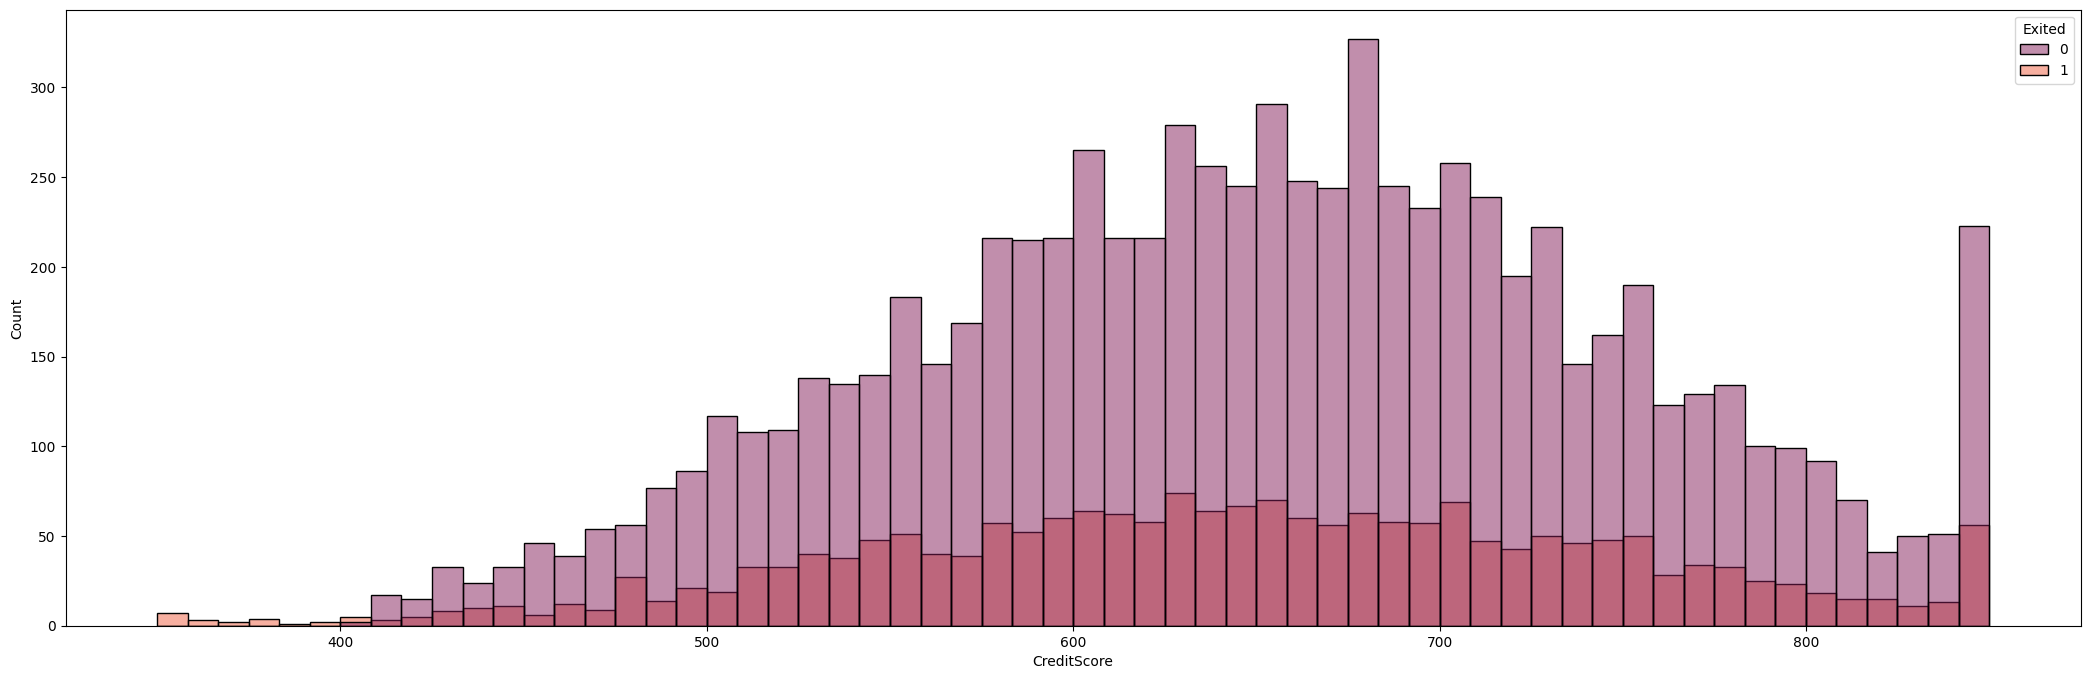

In [35]:
plt.figure(figsize=(26,8))
sns.histplot(x=df['CreditScore'], hue= df['Exited'], bins=60, palette='rocket', edgecolor='black')

#### The majority of customers who have exited (labeled as "1") exhibit lower CreditScores. Additionally, customers with mid-range CreditScores tend to churn at a higher rate. Conversely, those customers with higher CreditScores have a lower likelihood of churning.

In [36]:
country = df['Geography'].value_counts().reset_index()
country

,Geography,count
0,France,5014
1,Germany,2509
2,Spain,2477


<Axes: xlabel='Geography', ylabel='count'>

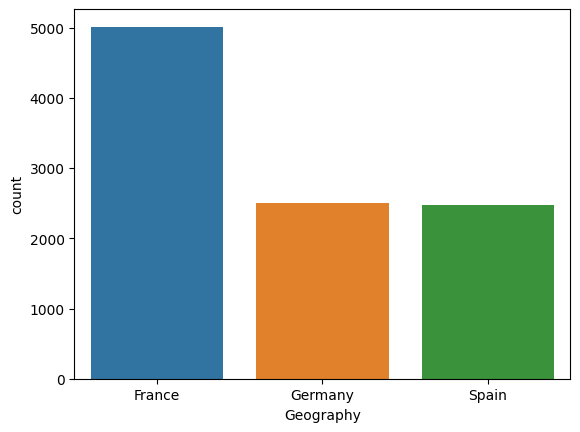

In [37]:
sns.barplot(x=country['Geography'], y =country['count'])

#### Based on the graph, it's evident that the majority of regular customers are from France, and they are the least likely to churn.

In [38]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [39]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [40]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


As a rule of thumb, we can consider using:

- Label Encoding -- Binary Categoriacal Variables and Ordinal Variables 
- One Hot Encoding -- Non Ordinal Categorical Variables with low to mild cardinality (<5-10 Levels) 
- Target Encoding -- Categorical Variabels with >10  Levels


Here 'HasCrCard' and 'IsActiveMember' are already label encoded 
- For Gender, a simple Label Encoder should be fine.
- For Geography, Since There are 3 Levels OneHotEncoding should do the trick

In [41]:
df = pd.get_dummies(df, columns=['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance','NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary'])

In [42]:
df

,Exited,CreditScore_350,CreditScore_351,CreditScore_358,CreditScore_359,CreditScore_363,CreditScore_365,CreditScore_367,CreditScore_373,CreditScore_376,...,EstimatedSalary_199805.63,EstimatedSalary_199808.1,EstimatedSalary_199841.32,EstimatedSalary_199857.47,EstimatedSalary_199862.75,EstimatedSalary_199909.32,EstimatedSalary_199929.17,EstimatedSalary_199953.33,EstimatedSalary_199970.74,EstimatedSalary_199992.48
0,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9996,0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9997,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9998,1,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [43]:
df = df.astype(int)
df = df * 1

In [44]:
df

,Exited,CreditScore_350,CreditScore_351,CreditScore_358,CreditScore_359,CreditScore_363,CreditScore_365,CreditScore_367,CreditScore_373,CreditScore_376,...,EstimatedSalary_199805.63,EstimatedSalary_199808.1,EstimatedSalary_199841.32,EstimatedSalary_199857.47,EstimatedSalary_199862.75,EstimatedSalary_199909.32,EstimatedSalary_199929.17,EstimatedSalary_199953.33,EstimatedSalary_199970.74,EstimatedSalary_199992.48
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Dividing Dataset and Seperating The Target Column

In [45]:
X=df.loc[:, df.columns != 'Exited']
X.shape

(10000, 16935)

In [46]:
Y=df['Exited']
Y
Y.shape

(10000,)

### Dividing Dataset Into Training and Testing Dataset.
- Given that we have access to only this dataset, we reserve a test dataset for later evaluation. This test dataset will be used towards the end of our analysis to assess how well our selected model performs when faced with new, previously unseen data. This evaluation is essential for gauging the model's predictive capabilities and generalization to real-world scenarios.

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=26)


In [49]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 3. <u>Model Building</u>

### i. Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
LinReg = LogisticRegression()

In [52]:
LinReg.fit(X_train, Y_train)


D:\Virtual Environment\ANUJ\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [53]:
Y_Pred_LinReg = LinReg.predict(X_test)

In [54]:
print('Accuracy Score: {:.2f}'.format(accuracy_score(Y_test, Y_Pred_LinReg) * 100))

Accuracy Score: 85.47


In [55]:
print('Confusion Matrix:\n', confusion_matrix(Y_test, Y_Pred_LinReg))

Confusion Matrix:
 [[2299  115]
 [ 321  265]]


In [56]:
print('Classification Report:\n', classification_report(Y_test, Y_Pred_LinReg))

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      2414
           1       0.70      0.45      0.55       586

    accuracy                           0.85      3000
   macro avg       0.79      0.70      0.73      3000
weighted avg       0.84      0.85      0.84      3000



### ii. Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
RanForClf = RandomForestClassifier(random_state=50)


In [59]:
RanForClf.fit(X_train, Y_train)

RandomForestClassifier(random_state=50)

In [60]:

Y_Pred_RanForClf = RanForClf.predict(X_test)

In [61]:
print('Confusion Matrix: \n', confusion_matrix(Y_test, Y_Pred_RanForClf))


Confusion Matrix: 
 [[2387   27]
 [ 438  148]]


In [62]:
print('Accuracy Score: ', accuracy_score(Y_test, Y_Pred_RanForClf)*100)

Accuracy Score:  84.5


In [63]:
print('Classification Report:\n', classification_report(Y_test, Y_Pred_RanForClf))

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.99      0.91      2414
           1       0.85      0.25      0.39       586

    accuracy                           0.84      3000
   macro avg       0.85      0.62      0.65      3000
weighted avg       0.85      0.84      0.81      3000



### iii. Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
DecTreeClf = DecisionTreeClassifier(criterion='gini', random_state=60, max_depth=1, min_samples_leaf=5)

In [66]:
DecTreeClf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=1, min_samples_leaf=5, random_state=60)

In [67]:
Y_Pred_DecTreeClf = DecTreeClf.predict(X_test)

In [68]:
print('Confusion Matrix: \n', confusion_matrix(Y_test, Y_Pred_DecTreeClf))

Confusion Matrix: 
 [[2414    0]
 [ 586    0]]


In [69]:
print('Classification Report: \n', classification_report(Y_test, Y_Pred_DecTreeClf))

Classification Report: 
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      2414
           1       0.00      0.00      0.00       586

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.45      3000
weighted avg       0.65      0.80      0.72      3000



D:\Virtual Environment\ANUJ\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Virtual Environment\ANUJ\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Virtual Environment\ANUJ\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
print("Accuracy Score: ",accuracy_score(Y_test,Y_Pred_DecTreeClf)*100)

Accuracy Score:  80.46666666666667


In [71]:

classifiers = ["Logistic Regression", "Random Forest Classifier", "Decision Tree Classifier"]
predictions = [Y_Pred_LinReg, Y_Pred_RanForClf, Y_Pred_DecTreeClf]

results = []
for classifier, y_pred in zip(classifiers, predictions):
    accuracy = accuracy_score(Y_test, y_pred) * 100
    results.append([classifier, accuracy])


In [72]:
df1 = pd.DataFrame(results, columns=["Classifier", "Accuracy Score"])

In [73]:
df1

,Classifier,Accuracy Score
0,Logistic Regression,85.466667
1,Random Forest Classifier,84.500000
2,Decision Tree Classifier,80.466667


### Hyper Parameter Tuning

- <u>RandomSearch for Large Datasets</u>: RandomSearch is ideal for handling extensive datasets with numerous hyperparameter settings. Its randomized approach efficiently explores the parameter space, making it a practical choice when computational resources are limited.

- <u>GridSearch Precision</u>: GridSearch, in contrast, offers meticulous hyperparameter tuning by systematically evaluating predefined combinations. This method typically yields superior model performance but can be computationally intensive. Smart tuning techniques can enhance its efficiency.

- <u>Focusing on F1 Metric</u>: Prioritizing optimization based on the F1 metric is prudent, especially for classification tasks. The F1 score balances precision and recall, providing a holistic measure of model performance.

- <u>High Default Recall</u>: Notably, the model demonstrates a commendable 75% recall rate with default parameters. By optimizing for the F1 score, we aim to maintain this strong recall while considering precision, resulting in a well-rounded model.

- <u>Balanced and Effective Approach</u>: The choice to optimize for the F1 metric underscores a commitment to achieving a balanced and effective model, crucial for scenarios where both false positives and false negatives have implications.






In [74]:
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

## 4. <u>Visualising</u>


#### Confusion Matrix - LogisticRegression

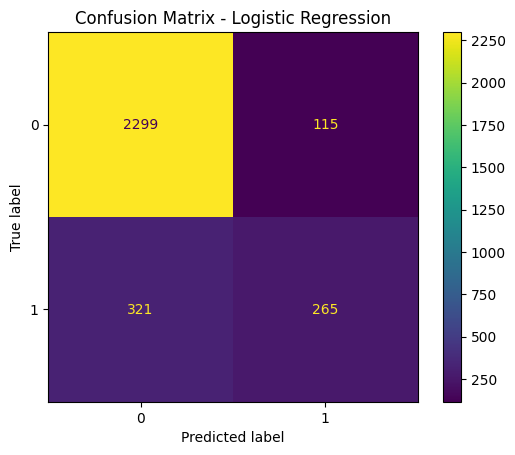

In [75]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test,Y_Pred_LinReg))
disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

#### Confusion Matrix - Random Forest

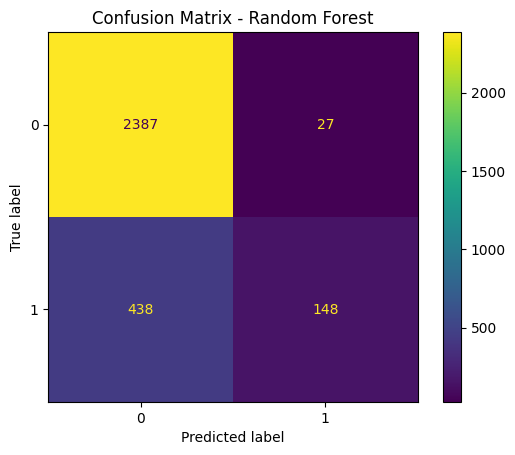

In [76]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test,Y_Pred_RanForClf))
disp.plot()
plt.title("Confusion Matrix - Random Forest")
plt.show()

#### Confusion Matrix - Decision Tree

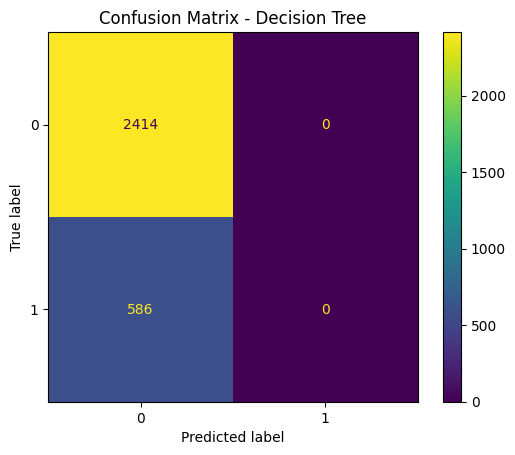

In [77]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test,Y_Pred_DecTreeClf))
disp.plot()
plt.title("Confusion Matrix - Decision Tree")
plt.show()

#### To calculate the False Positive Rate (FPR) and True Positive Rate (TPR) for all thresholds of a binary classification model, you can use the roc_curve function from scikit-learn.

### AUC - ROC - Linear Regression

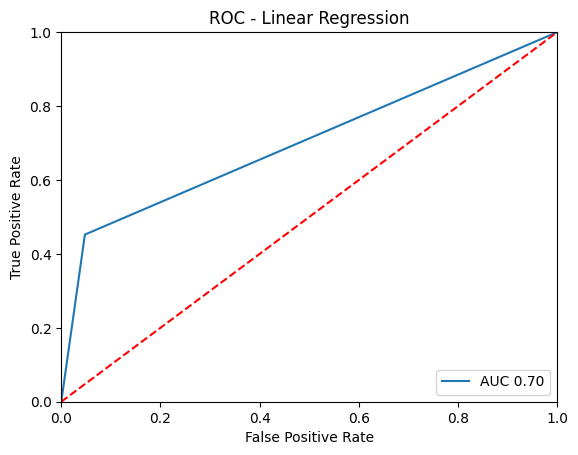

In [78]:
FalsePosRate, TruePosRate, threshold = metrics.roc_curve(Y_test, Y_Pred_LinReg)
roc_auc = metrics.auc(FalsePosRate,TruePosRate)

plt.title("ROC - Linear Regression")
plt.plot(FalsePosRate,TruePosRate,  label=f"AUC {roc_auc:.2f}")
plt.legend(loc ='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel('False Positive Rate')
plt.show()

### AUC - ROC - Decision Tree

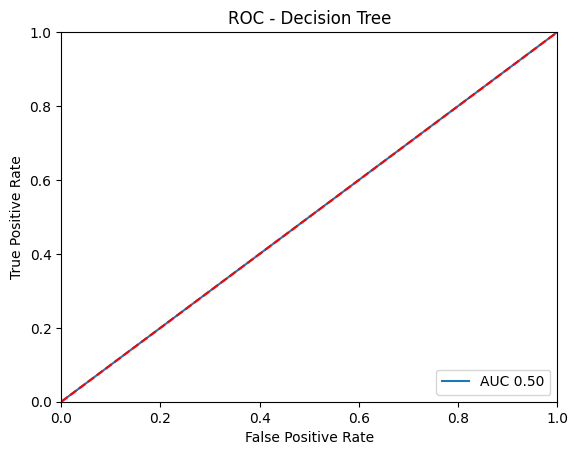

In [79]:
FalsePosRate, TruePosRate, threshold = metrics.roc_curve(Y_test, Y_Pred_DecTreeClf)
roc_auc = metrics.auc(FalsePosRate,TruePosRate)

plt.title("ROC - Decision Tree")
plt.plot(FalsePosRate,TruePosRate,  label=f"AUC {roc_auc:.2f}")
plt.legend(loc ='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel('False Positive Rate')
plt.show()

### AUC - ROC - RandomForest

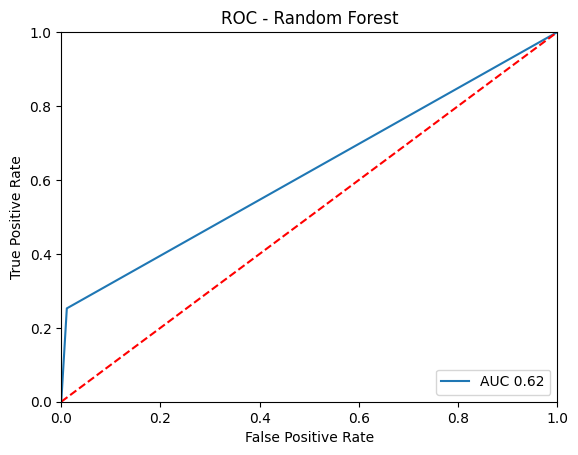

In [80]:
FalsePosRate, TruePosRate, threshold = metrics.roc_curve(Y_test, Y_Pred_RanForClf)
roc_auc = metrics.auc(FalsePosRate, TruePosRate)

plt.title("ROC - Random Forest")
plt.plot(FalsePosRate, TruePosRate, label=f"AUC {roc_auc:.2f}")
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel("True Positive Rate")
plt.xlabel('False Positive Rate')
plt.show()


In [81]:

df1 = {'Classifier': ['Logistic Regression', 'Random Forest Classifier', 'Decision Tree Classifier'],
        'Accuracy Score': [85.466667, 84.5, 80.466667],
        'AUC': [0.70, 0.62, 0.50]}

df1 = pd.DataFrame(df1)

## 5. <u>Conclusion</u>

In [82]:
df1

,Classifier,Accuracy Score,AUC
0,Logistic Regression,85.466667,0.70
1,Random Forest Classifier,84.500000,0.62
2,Decision Tree Classifier,80.466667,0.50


The table presents the performance metrics of three different classifiers: Logistic Regression, Random Forest Classifier, and Decision Tree Classifier. These classifiers were evaluated based on their accuracy scores and AUC (Area Under the Curve) values.

1. **<b>Logistic Regression</b>:** This classifier achieved the highest accuracy score among the three, with an accuracy of approximately 85.47%. Additionally, it exhibited a relatively high AUC of 0.70, indicating good discrimination ability in distinguishing between classes. This suggests that Logistic Regression is a strong candidate for this classification task.

2. **<b>Random Forest Classifier</b>:** The Random Forest Classifier performed well with an accuracy score of around 84.50%. While its accuracy is slightly lower than Logistic Regression, it still indicates a strong predictive performance. The AUC value of 0.62 suggests that it has a good ability to classify instances correctly.

3. **<b>Decision Tree Classifier</b>:** The Decision Tree Classifier achieved an accuracy score of approximately 80.47%, which is slightly lower than the other two classifiers. Its AUC value of 0.50 indicates that it performs at a chance level in distinguishing between classes. This suggests that the Decision Tree Classifier may require further tuning or might not be the most suitable choice for this specific task.

In conclusion, Logistic Regression appears to be the best-performing classifier for this classification problem, as it achieved the highest accuracy and AUC values. However, the choice of the classifier should also consider other factors such as interpretability, computational complexity, and specific business requirements.

## --------------------------------------------------------------- The End ---------------------------------------------------------------